In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  ## Stops keras from killing the kernel

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Implementing Multi-Layer Perceptrons (MLPs) with Keras

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

### 60k training images and 10k test images
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

## data was already randomized, reserving last 5k as validation data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valud = X_train_full[-5000:], y_train_full[:-5000]

class_names = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

### Quick Classification ANN

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
### Can access individual layers by name:
model.get_layer('dense_2')

### Can access individual layers by oder:
model.layers[1]

In [6]:
weights, biases = model.layers[1].get_weights()

print(weights)  ### Randomized initially
print(biases)   ### Zero initially

[[-0.03726853 -0.03894404 -0.02872454 ...  0.02393193 -0.05703107
  -0.01527878]
 [-0.04423901 -0.04174865  0.02388988 ... -0.07027215  0.0695723
   0.06489587]
 [-0.05825613  0.05076981 -0.04412453 ...  0.0380493  -0.06284156
  -0.04356959]
 ...
 [ 0.00983121 -0.04979338 -0.00061077 ... -0.02268281  0.01116541
  -0.04909769]
 [ 0.0548705  -0.04790262 -0.03516574 ...  0.03030725  0.01771414
  -0.01091151]
 [ 0.01447421 -0.01591593 -0.04280371 ... -0.07184565  0.02694561
   0.02238535]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [7]:
### Compile the model to assign learning metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Common Activation Functions

_Heavyside_ $\hskip 105pt H(x) = \left\{\begin{array}{ll} 0 & x<0 \\ 1 & x \geq 0\end{array}\right.$

_Rectified Linear Unit (ReLU)_ $\hskip 40pt R(x) = max(0,x)$

_Sigmoid_ $\hskip 115pt \sigma(x) = \dfrac{1}{1+e^{-x}}$

_Hypterbolic Tangent_ $\hskip 70pt \text{tanh}(x) = 2\sigma(2x)-1$

In [8]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

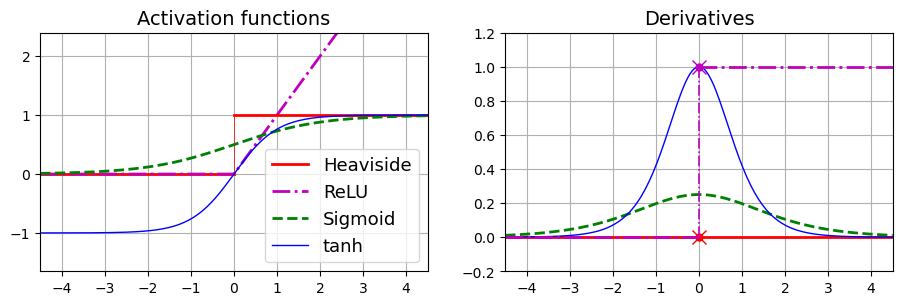

In [9]:
max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()